In [60]:
from sage.repl.image import Image as sageImage
from PIL import Image as PILImage

def imagetomatrices(sageimage):
    R = matrix(RDF, sageimage.width(), sageimage.height(), lambda i, j: sageimage.pixels()[i,j][0])
    G = matrix(RDF, sageimage.width(), sageimage.height(), lambda i, j: sageimage.pixels()[i,j][1])
    B = matrix(RDF, sageimage.width(), sageimage.height(), lambda i, j: sageimage.pixels()[i,j][2])
    
    return [R,G,B]

def matricestoimage(matrices, filename='untitled.png', saveimage=False, showimage=False):
    [Rrows, Rcolumns] = matrices[0].dimensions()
    [Grows, Gcolumns] = matrices[1].dimensions()
    [Brows, Bcolumns] = matrices[2].dimensions()
    
    if Rrows != Grows or Grows != Brows or Rcolumns != Gcolumns or Gcolumns != Bcolumns:
        raise Exception('Matrices must be of equal dimensions')
        
    sageimage = sageImage('RGB', (Rcolumns, Rrows))
    pixels = sageimage.pixels()
    for i in range(Rcolumns):
        for j in range(Rrows):
            rgbtuple = tuple([(matrices[0][j,i]).round(), (matrices[1][j,i]).round(), (matrices[2][j,i]).round()])
            pixels[i,j] = rgbtuple
    if saveimage:
        sageimage.save(filename)
    if showimage:
        sageimage.show()
    return sageimage

def filetomatrices(filename):
    PILimage = PILImage.open(filename)
    listdata = list(PILimage.getdata())
    [width, height] = PILimage.size
    
    R = matrix(RDF, height, width, [rgbtriple[0] for rgbtriple in listdata])
    B = matrix(RDF, height, width, [rgbtriple[1] for rgbtriple in listdata])
    G = matrix(RDF, height, width, [rgbtriple[2] for rgbtriple in listdata])
    
    return [R,B,G]

def compressmatrix(matrix, singularvalues):
    [columns, rows] = matrix.dimensions()
    if singularvalues > min(columns, rows):
        raise Exception('Number of singular values exceeded')
        
    [U,S,V] = matrix.SVD()
    
    return U[:,:singularvalues] * S[:singularvalues, :singularvalues] * (V[:,:singularvalues]).conjugate_transpose()

def compressimage(image, k, filename='untitled_compressed.png', showresult=False, saveresult=False):
    if type(image) == str:
        matrices = filetomatrices(image)
        
    elif type(image) == sage.repl.image.Image:
        matrices = imagetomatrices(image)
        
    elif type(image) == list and len(image) == 3:
        matrices = image
    
    rankkmatrices = [compressmatrix(matrices[0],k), compressmatrix(matrices[1],k), compressmatrix(matrices[2],k)]
    
    return matricestoimage(rankkmatrices, filename, showresult, saveresult)

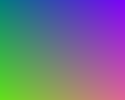

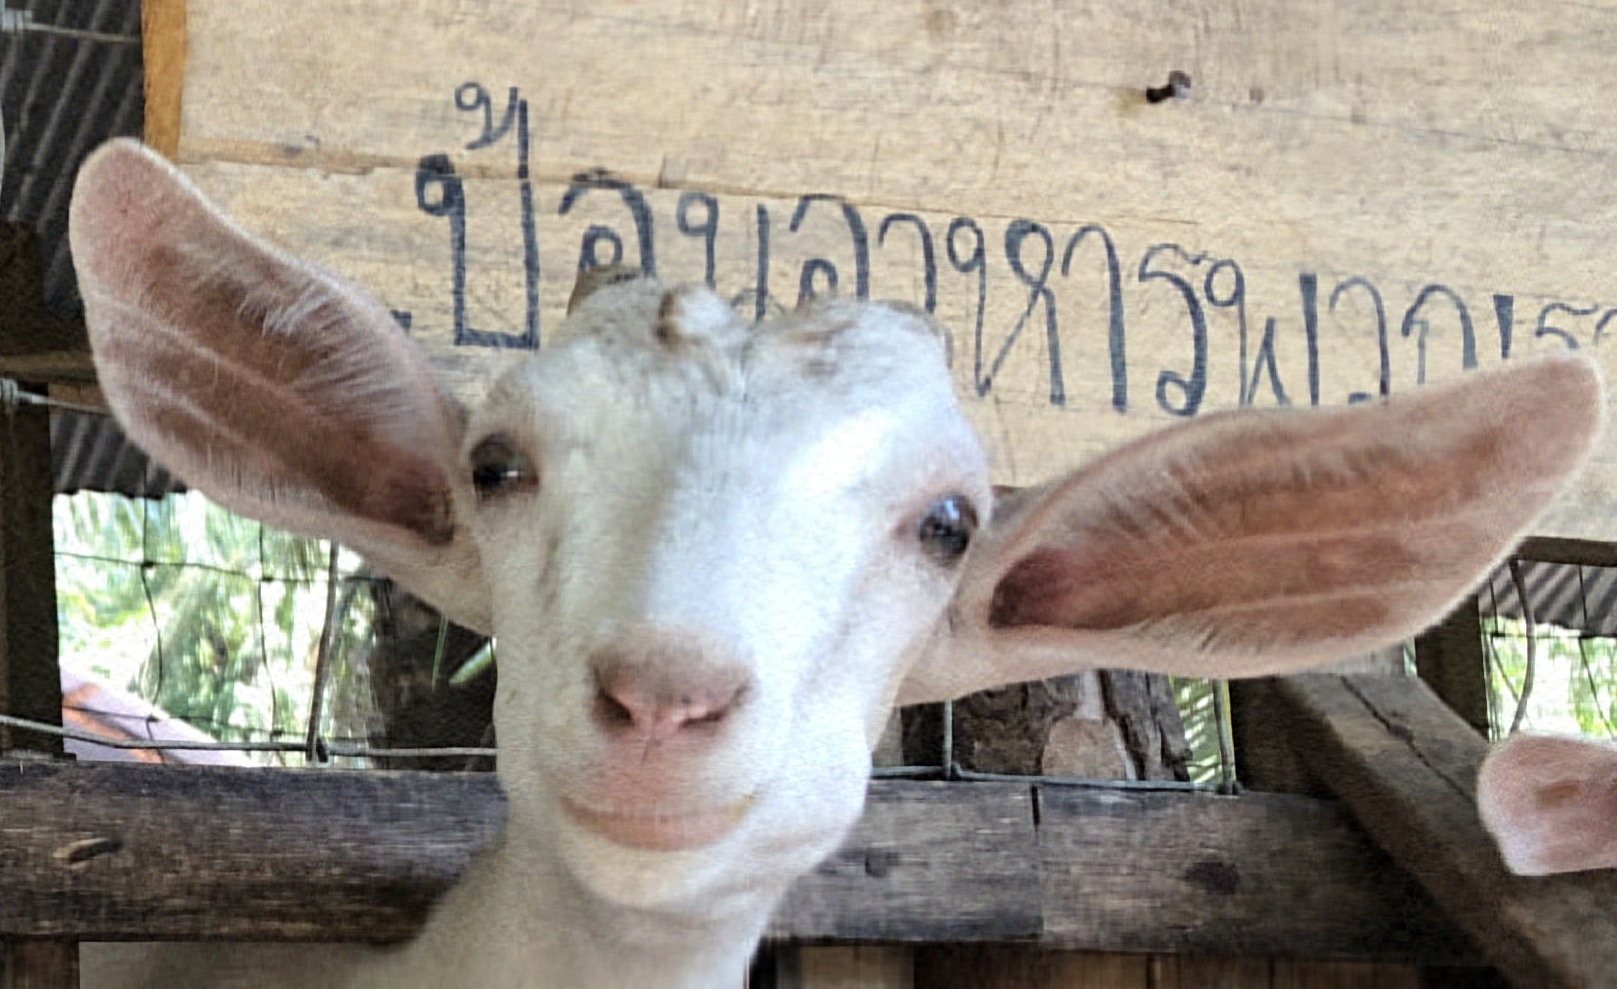

In [64]:
m = [matrix(RDF, 100,125, lambda i,j: i+j), matrix(RDF, 100,125, lambda i,j: 125 + i - j), matrix(RDF, 100,125, lambda i,j: 125 - i +j)]
im = matricestoimage(m, showimage=True)

compressimage('goat.png', 100, showresult=True)

